# Segmenting and Clustering Neighborhoods in Toronto

## Objective:

The objective of this project includes scraping the Wikipedia page for the postal codes of Canada and then process and clean the data, exploring neighborhoods in <b>Toronto</b> using <b>Foursquare API</b>, and then, clustering the neighbohoods with the help of <b><i>K</i>-means</b> clustering algorithm. Finally, we will use the <b>Folium</b> library to visualize the <b>neighborhoods in Toronto</b> and their emerging <b>clusters</b>.

## Table of Contents

- Install and import required Libraries 
- Data Aquisition and pre-processing
- Explore neighborhood in Toronto
- Analyze each neighborhood
- Cluster neighborhoods using <b><i>K</i>-means</b>
- Examine Clusters

## Install and import required Libraries 

In [43]:
# Import required libraries
# !pip install beautifulsoup4
# !pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# !conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print("Libraries installed and imported.")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Libraries installed and imported.


### Data Aquisition and Pre-processing

### A. Scraping the Wikipedia page for the table of postal codes of Canada

Python <b>BeautifulSoup</b> Library is used for scraping the table data from the Wikipedia. The title of the webpage is printed to check if the page has been scraped successfully or not. Then the table of postal codes of Canada is printed.

In [3]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>List of postal codes of Canada: M - Wikipedia</title>


Postal Code,Borough,Neighbourhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Regent Park, Harbourfront"
M6A,North York,"Lawrence Manor, Lawrence Heights"
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
M8A,Not assigned,Not assigned
M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
M1B,Scarborough,"Malvern, Rouge"


The html table is converted to pandas dataframe for data preprocessing.

In [4]:
dfs = pd.read_html(tab)
df=dfs[0]
df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


### B. Data preprocessing

In [7]:
df1 = df[df.Borough != 'Not assigned']

# Combining the neighbourhoods with same Postalcode
df2 = df1.groupby(['Postal Code','Borough'], sort=False).agg(', '.join)
df2.reset_index(inplace=True)

# Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough
df2['Neighbourhood'] = np.where(df2['Neighbourhood'] == 'Not assigned',df2['Borough'], df2['Neighbourhood'])

df2.head(10)

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [8]:
# Shape of data frame
df2.shape

(103, 3)

In [11]:
print("Number of boroughs: {}".format(len(df2['Borough'].unique())))
print("Number of neighborhoods: {}".format(len(df2['Neighbourhood'].unique())))

Number of boroughs: 10
Number of neighborhoods: 99


Toronto has a total of <b>10</b> boroughs and <b>99</b> neighborhoods. In order to segment the neighborhoods and explore them, we will essentially need a dataset that contains the <b>10</b> boroughs and the neighborhoods that exist in each borough as well as the latitude and logitude coordinates of each neighborhood.

### C. Importing the csv file conatining the latitudes and longitudes for various neighbourhoods in Canada

In [12]:
lat_lon = pd.read_csv('https://cocl.us/Geospatial_data')
lat_lon.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### D. Merging the two tables for getting the Latitudes and Longitudes for various neighbourhoods in Canada

In [14]:
df3 = pd.merge(df2,lat_lon,on='Postal Code')
df3.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


### E. Getting all the Boroughs containing Toronto

In [15]:
toronto_df = df3[df3['Borough'].str.contains('Toronto',regex=False)]
toronto_df.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [16]:
# get the size
toronto_df.shape

(39, 5)

## Explore neighborhood in Toronto

### A. Visualizing all the Neighbourhoods using Folium

In [18]:
toronto_map = folium.Map(location=[43.651070,-79.347015], zoom_start=12)

for lat,lng,borough,neighbourhood in zip(toronto_df['Latitude'],toronto_df['Longitude'],toronto_df['Borough'],toronto_df['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(toronto_map)
toronto_map

<b>Note</b>: The map created using Folium might not be visible on Github. Hence, an image of this map is created and pasted below using markdown.

<img src="../images/toronto_map.png" width="800" height="400">

### B. Explore the neighborhoods and segment them utilizing the <b>Foursquare API</b>

##### Define Foursquare Credentials and Version

In [80]:
# Define Foursquare Credentials and Version
client_id = '' # Foursquare ID
client_secret = '' # Foursquare Secret
access_token = '' # Foursquare Access Token
version = '20180604'
limit = 100

# Print Credentials
# print('Foursquare Credentials:')
# print('CLIENT_ID: ', client_id)
# print('CLIENT_SECRET: ', client_secret)

##### Explore the first neighborhood in our dataframe.

Get the neighborhood's name and the geographical coordinates by setting up limit as 100 venues and radius of 500m.

In [49]:
# function to get all the nearby venues in the neighborhoods in Toronto
def get_nearby_venues(names, latitudes, longitudes, radius=500):
    
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
        
        # create the API request URL 
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
            client_id, 
            client_secret, 
            lat, 
            lng, 
            version, 
            radius, 
            limit)
        
        # make the GET request
        venues = requests.get(url).json()['response']['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['name'],
            v['location']['lat'],
            v['location']['lng'],
            v['categories']) for v in venues])
        
    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood',
                            'Neighbourhood_Lat',
                            'Neighbourhood_Lng',
                             'Venue',
                             'Venue_Lat',
                             'Venue_Lng',
                             'Venue_Category']
    
    # call helper function venue_category() to filter the category for each row (axis=1)
    nearby_venues['Venue_Category'] = nearby_venues.apply(venue_category, axis=1)
    return nearby_venues

# function that extracts the category of the venue
def venue_category(row):
    
    categories_list = row['Venue_Category']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Call the function <b>get_nearby_venues()</b> to get all the nearby venues in Manhattan

In [50]:
# call the function get_nearby_venues() to get all the nearby venues in Manhattan
venues_in_toronto = get_nearby_venues(names=toronto_df['Neighbourhood'],
                                   latitudes=toronto_df['Latitude'],
                                   longitudes=toronto_df['Longitude']
                                  )

venues_in_toronto.head()

,Neighbourhood,Neighbourhood_Lat,Neighbourhood_Lng,Venue,Venue_Lat,Venue_Lng,Venue_Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Oldtown Bodega,43.653966,-79.360752,Café
1,"Regent Park, Harbourfront",43.65426,-79.360636,Sackville Playground,43.654656,-79.359871,Park
2,"Regent Park, Harbourfront",43.65426,-79.360636,TTC Streetcar #504 King St,43.677508,-79.358114,Moving Target
3,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
4,"Regent Park, Harbourfront",43.65426,-79.360636,TTC Streetcar #503 Kingston Rd,43.663514,-79.337697,Moving Target


Get the size of the resulting dataframe

In [51]:
# Get the size of the resulting dataframe
print(venues_in_toronto.shape)

(3721, 7)


Get the number of venues returned for each neighborhood

In [52]:
# Get the number of venues returned for each neighborhood
print("The number of venues returned for each neighborhood: ")
print(venues_in_toronto['Neighbourhood'].count())

The number of venues returned for each neighborhood: 
3721


Get all the unique venue category

In [53]:
# Get all the unique venue category
print("{} unique venue category.".format(len(venues_in_toronto['Venue_Category'].unique())))

411 unique venue category.


## 3. Analyze Each Neighborhood

In [54]:
# venues_in_toronto[['Venue_Category']]
# one hot encoding
toronto_onehot = pd.get_dummies(venues_in_toronto[['Venue_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = venues_in_toronto['Neighbourhood']

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,Alternative Healer,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Baggage Claim,Bakery,Ballroom,Bank,Bar,Baseball Field,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Center,Business Service,Butcher,Cable Car,Cafeteria,Café,Camera Store,Campaign Office,Candy Store,Capitol Building,Car Wash,Caribbean Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,City Hall,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College & University,College Academic Building,College Administrative Building,College Arts Building,College Auditorium,College Bookstore,College Cafeteria,College Classroom,College Communications Building,College Engineering Building,College Gym,College History Building,College Lab,College Library,College Quad,College Rec Center,College Residence Hall,College Science Building,College Soccer Field,College Theater,College Track,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Community College,Concert Hall,Conference Room,Convenience Store,Convention Center,Corporate Cafeteria,Corporate Coffee Shop,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,EV Charging Station,Eastern European Restaurant,Electronics Store,Elementary School,Embassy / Consulate,Emergency Room,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Space,Eye Doctor,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Film Studio,Financial or Legal Service,Fire Station,Fish & Chips Shop,Flight School,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Frame Store,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Funeral Home,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hospital Ward,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Internet Cafe,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Lawyer,Library,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Medical Center,Medical Lab,Medical School,Mediterranean Restaurant,Meeting Room,Men's Store,Mental Health Office,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Middle School,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Mobility Store,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Mosque,Motorcycle Shop,Movie Theater,Moving Target,Music Sc

In [55]:
# Get the size of new dataframe
toronto_onehot.shape

(3721, 411)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [56]:
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped.head(5)

,Neighbourhood,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,Alternative Healer,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Baggage Claim,Bakery,Ballroom,Bank,Bar,Baseball Field,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Center,Business Service,Butcher,Cable Car,Cafeteria,Café,Camera Store,Campaign Office,Candy Store,Capitol Building,Car Wash,Caribbean Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,City Hall,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College & University,College Academic Building,College Administrative Building,College Arts Building,College Auditorium,College Bookstore,College Cafeteria,College Classroom,College Communications Building,College Engineering Building,College Gym,College History Building,College Lab,College Library,College Quad,College Rec Center,College Residence Hall,College Science Building,College Soccer Field,College Theater,College Track,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Community College,Concert Hall,Conference Room,Convenience Store,Convention Center,Corporate Cafeteria,Corporate Coffee Shop,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,EV Charging Station,Eastern European Restaurant,Electronics Store,Elementary School,Embassy / Consulate,Emergency Room,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Space,Eye Doctor,Fabric Shop,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Film Studio,Financial or Legal Service,Fire Station,Fish & Chips Shop,Flight School,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Frame Store,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Funeral Home,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hospital Ward,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Internet Cafe,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Lawyer,Library,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Medical Center,Medical Lab,Medical School,Mediterranean Restaurant,Meeting Room,Men's Store,Mental Health Office,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Middle School,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Mobility Store,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Mosque,Motorcycle Shop,Movie Theater,Moving Target,Music Sc

In [57]:
# get the new size
toronto_grouped.shape

(39, 411)

Let's print each neighborhood along with the top 5 most common venues

In [58]:
# print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in toronto_grouped['Neighbourhood']:
    print(hood)
    print("-------------------------------------------------")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

Berczy Park
-------------------------------------------------
                                      venue  freq
0                                    Office  0.12
1                                  Building  0.08
2                                   Parking  0.03
3  Residential Building (Apartment / Condo)  0.03
4                             Movie Theater  0.02


Brockton, Parkdale Village, Exhibition Place
-------------------------------------------------
                                      venue  freq
0                                    Office  0.23
1  Residential Building (Apartment / Condo)  0.16
2                              Tech Startup  0.07
3                                  Building  0.04
4                           Conference Room  0.04


Business reply mail Processing Centre, South Central Letter Processing Plant Toronto
-------------------------------------------------
                venue  freq
0            Building  0.04
1  Light Rail Station  0.03
2              Offic

                                      venue  freq
0  Residential Building (Apartment / Condo)  0.13
1                                    Office  0.11
2                           Doctor's Office  0.05
3                                  Building  0.05
4                          Dentist's Office  0.04


The Annex, North Midtown, Yorkville
-------------------------------------------------
                                      venue  freq
0  Residential Building (Apartment / Condo)  0.13
1                                    Office  0.05
2                                  Building  0.04
3                           Bed & Breakfast  0.04
4                     General Entertainment  0.03


The Beaches
-------------------------------------------------
                venue  freq
0              School  0.06
1                Park  0.04
2            Building  0.03
3          Playground  0.03
4  Salon / Barbershop  0.03


The Danforth West, Riverdale
-------------------------------------------------

Now let's create the new dataframe and display the top 10 venues for each neighborhood

In [59]:
# first, let's write a function to sort the venues in descending order
def get_popular_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [60]:
# create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for idx in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(idx+1, indicators[idx]))
    except:
        columns.append('{}th Most Common Venue'.format(idx+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

# fill with value
for idx in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[idx, 1:] = get_popular_venues(toronto_grouped.iloc[idx, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Office,Building,Parking,Residential Building (Apartment / Condo),Hotel,Pub,Korean Restaurant,Breakfast Spot,Laundry Service,Tech Startup
1,"Brockton, Parkdale Village, Exhibition Place",Office,Residential Building (Apartment / Condo),Tech Startup,Building,Conference Room,Advertising Agency,Dentist's Office,Coworking Space,Convenience Store,Café
2,"Business reply mail Processing Centre, South C...",Building,Office,Light Rail Station,Theater,Medical Center,Butcher,Fast Food Restaurant,Rental Car Location,Restaurant,Gym / Fitness Center
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Gate,Airport Service,Moving Target,Airport Terminal,Park,Airport Lounge,Harbor / Marina,Coffee Shop,Airport,Boat or Ferry
4,Central Bay Street,Hospital,Hospital Ward,Medical Center,Office,Pharmacy,Coffee Shop,Emergency Room,Sandwich Place,Mediterranean Restaurant,Parking


## Cluster Neighborhoods using <i>K</i>-means

#### Identify the optimal value of <b><i>k</i></b> using the Elbow method

In [61]:
# !pip install kneed
from kneed import KneeLocator

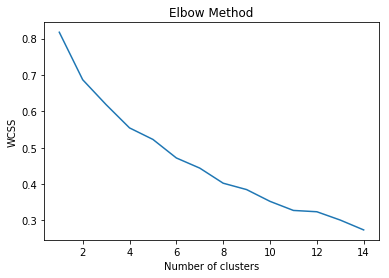

In [62]:
# drop the column 'Neighborhood'
cluster_data = toronto_grouped.drop('Neighbourhood', 1)

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, max_iter=500, random_state=4)
    kmeans.fit(cluster_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [64]:
# Identify the elbow point in the wcss curve using KneeLocator()
kl = KneeLocator(range(1, 15), wcss, curve="convex", direction="decreasing")
print("Optimal value of k: {}".format(kl.elbow))

Optimal value of k: 6


Run <b><i>K</i>-means</b> to cluster the neighborhood into <b>6</b> clusters.

In [65]:
# set number of clusters
cluster_num = 6

# drop the column 'Neighborhood'
toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# Initialize and fit the model
kmeans = KMeans(n_clusters=cluster_num, random_state=4).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_

print(labels)

[1 2 5 4 3 1 2 1 5 2 5 1 5 5 2 5 5 0 5 5 5 5 5 5 1 1 2 5 5 1 5 1 5 2 2 5 5
 1 5]


Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [66]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = toronto_df

# merge manhattan_grouped with manhattan to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Office,Automotive Shop,Furniture / Home Store,Park,Coffee Shop,Building,Food Truck,Art Gallery,Italian Restaurant,Auto Dealership
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,5,Government Building,Medical Center,Building,Office,Capitol Building,Restaurant,Doctor's Office,College Library,Hospital,Medical Lab
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,5,College Lab,College Administrative Building,University,Student Center,College Academic Building,General College & University,College Arts Building,Parking,Coffee Shop,Salon / Barbershop
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Office,Residential Building (Apartment / Condo),Event Space,Building,Other Nightlife,Spa,Rental Car Location,Church,Clothing Store,Furniture / Home Store
19,M4E,East Toronto,The Beaches,43.676357,-79.293031,5,School,Park,Laundry Service,Playground,Building,Salon / Barbershop,Residential Building (Apartment / Condo),Doctor's Office,Coffee Shop,Martial Arts School


Finally, let's visualize the resulting clusters

In [70]:
# create map
map_clusters = folium.Map(location=[43.651070,-79.347015], zoom_start=11)

# set color scheme for the clusters
x = np.arange(cluster_num)
ys = [i + x + (i*x)**2 for i in range(cluster_num)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<b>Note</b>: The map created using Folium might not be visible on Github. Hence, an image of this map is created and pasted below using markdown.

<img src="../images/toronto_clusters.png" width="800" height="400">

## 5. Examine Clusters

Now, we will examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we will assign a name to each cluster.

#### Cluster 1

In [74]:
cluster1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster1.head()

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
84,Downtown Toronto,0,Thrift / Vintage Store,Salon / Barbershop,Boutique,Vietnamese Restaurant,Art Gallery,Bar,Chinese Restaurant,Clothing Store,Farmers Market,Residential Building (Apartment / Condo)


#### Cluster 2

In [75]:
cluster2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster2.head(3)

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Downtown Toronto,1,Office,Automotive Shop,Furniture / Home Store,Park,Coffee Shop,Building,Food Truck,Art Gallery,Italian Restaurant,Auto Dealership
15,Downtown Toronto,1,Office,Residential Building (Apartment / Condo),Event Space,Building,Other Nightlife,Spa,Rental Car Location,Church,Clothing Store,Furniture / Home Store
20,Downtown Toronto,1,Office,Building,Parking,Residential Building (Apartment / Condo),Hotel,Pub,Korean Restaurant,Breakfast Spot,Laundry Service,Tech Startup


#### Cluster 3

In [76]:
cluster3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster3.head(3)

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
36,Downtown Toronto,2,Residential Building (Apartment / Condo),Office,Coffee Shop,Building,Light Rail Station,Parking,Doctor's Office,Fried Chicken Joint,Tech Startup,Tea Room
43,West Toronto,2,Office,Residential Building (Apartment / Condo),Tech Startup,Building,Conference Room,Advertising Agency,Dentist's Office,Coworking Space,Convenience Store,Café
67,Central Toronto,2,Residential Building (Apartment / Condo),Office,Dog Run,Gym,Building,Scenic Lookout,Medical Center,Park,Dentist's Office,Music Venue


#### Cluster 4

In [77]:
cluster4 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster4.head(3)

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Downtown Toronto,3,Hospital,Hospital Ward,Medical Center,Office,Pharmacy,Coffee Shop,Emergency Room,Sandwich Place,Mediterranean Restaurant,Parking


#### Cluster 5

In [78]:
cluster5 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster5.head(3)

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
87,Downtown Toronto,4,Airport Gate,Airport Service,Moving Target,Airport Terminal,Park,Airport Lounge,Harbor / Marina,Coffee Shop,Airport,Boat or Ferry


#### Cluster 6

In [79]:
cluster6 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster6.head(3)

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Downtown Toronto,5,Government Building,Medical Center,Building,Office,Capitol Building,Restaurant,Doctor's Office,College Library,Hospital,Medical Lab
9,Downtown Toronto,5,College Lab,College Administrative Building,University,Student Center,College Academic Building,General College & University,College Arts Building,Parking,Coffee Shop,Salon / Barbershop
19,East Toronto,5,School,Park,Laundry Service,Playground,Building,Salon / Barbershop,Residential Building (Apartment / Condo),Doctor's Office,Coffee Shop,Martial Arts School
